Dataset Link: [https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction](https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction)

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
from pmdarima import auto_arima
from google.colab import drive
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from math import sqrt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = './datasets/Data_Train (2).csv'
df = pd.read_csv(file_path)

df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

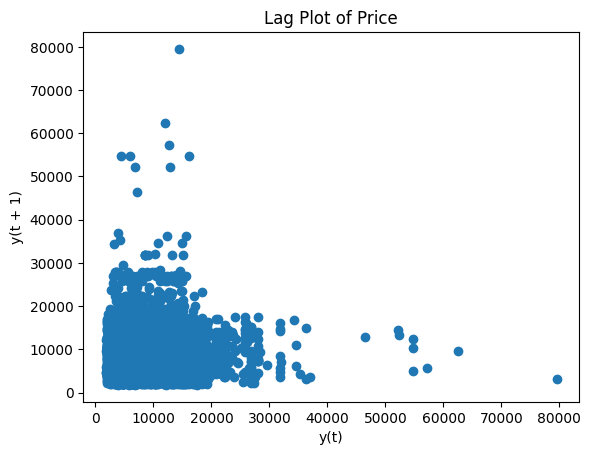

In [ ]:
# Function to create a lag plot for the 'Price' column
def plot_lag_price(dataframe, column_name='Price'):
    if column_name in dataframe.columns:
        lag_plot(dataframe[column_name])
        plt.title(f'Lag Plot of {column_name}')
        plt.show()
    else:
        print(f"Column '{column_name}' not found in the dataset.")

# Create a lag plot for the 'Price' column
plot_lag_price(df)

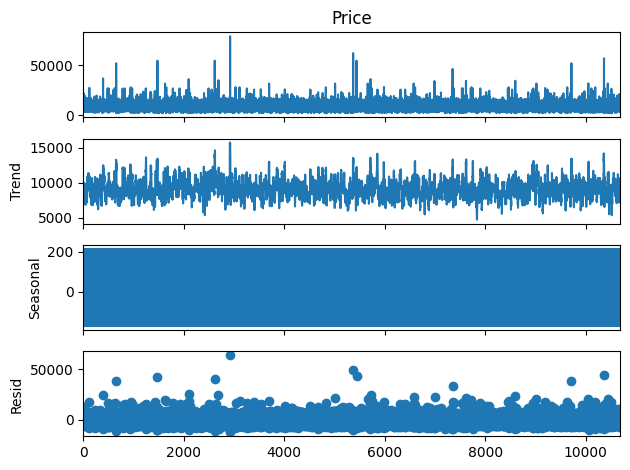

In [ ]:
# Assuming 'Date' column is present and needs to be converted to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Decompose the 'Price' column (replace 'Price' with your actual column name)
column_name = 'Price'
if column_name in df.columns:
    decomposition = seasonal_decompose(df[column_name], model='additive', period=12)

    # Plot the decomposed components
    decomposition.plot()
    plt.show()
else:
    print(f"Column '{column_name}' not found in the dataset.")


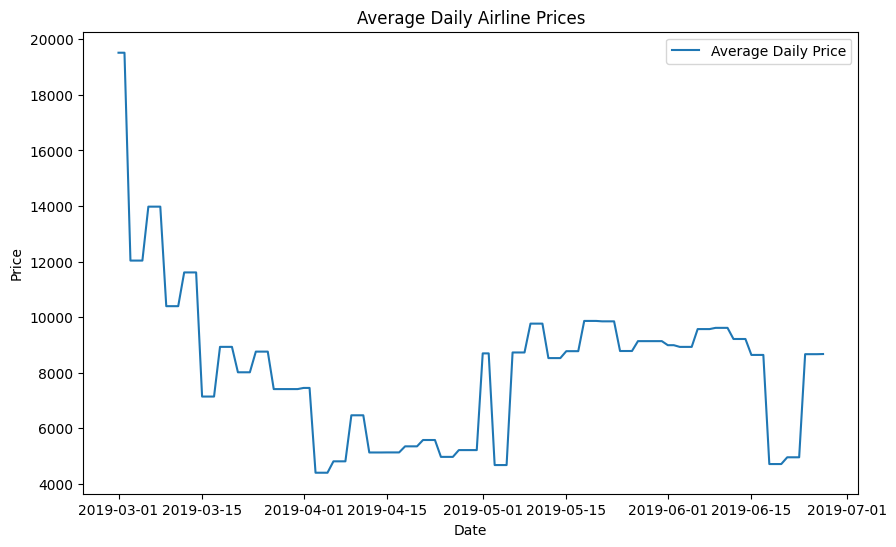

In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
daily_prices = df.groupby('Date_of_Journey')['Price'].mean().reset_index()

# Ensure there is one entry per day, setting the date as the index
daily_prices.set_index('Date_of_Journey', inplace=True)

daily_prices = daily_prices.asfreq('D').fillna(method='ffill')

plt.figure(figsize=(10, 6))
plt.plot(daily_prices, label='Average Daily Price')
plt.title('Average Daily Airline Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

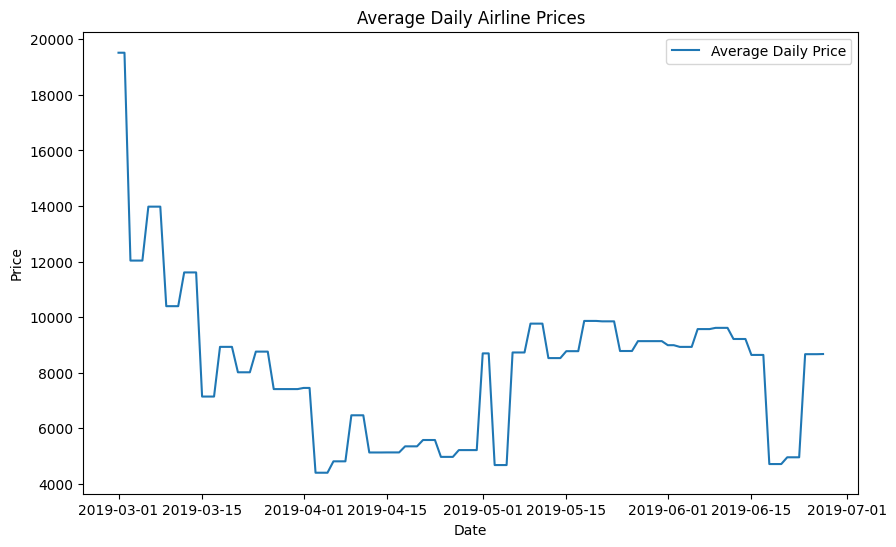

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_prices, label='Average Daily Price')
plt.title('Average Daily Airline Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

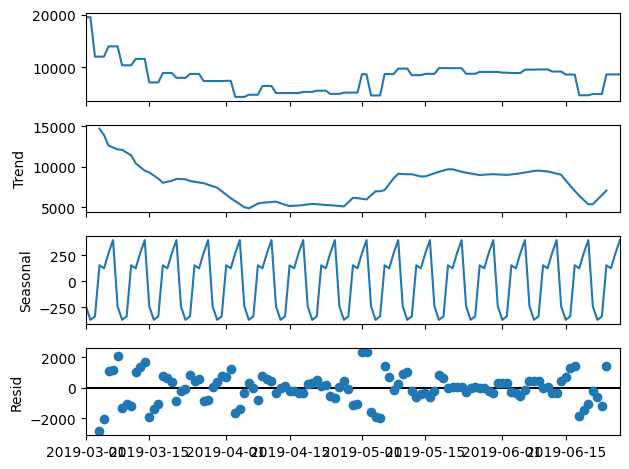

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(daily_prices, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


<Figure size 1000x600 with 0 Axes>

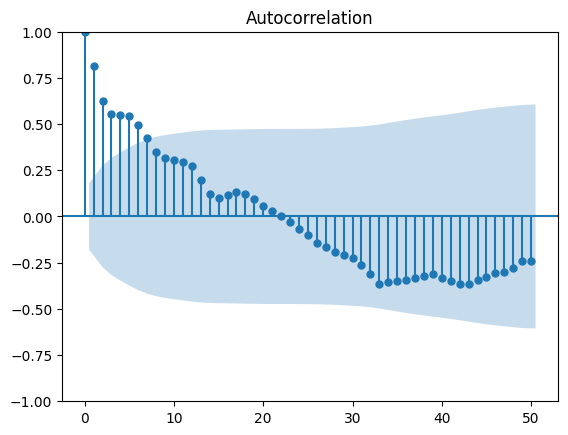

<Figure size 1000x600 with 0 Axes>

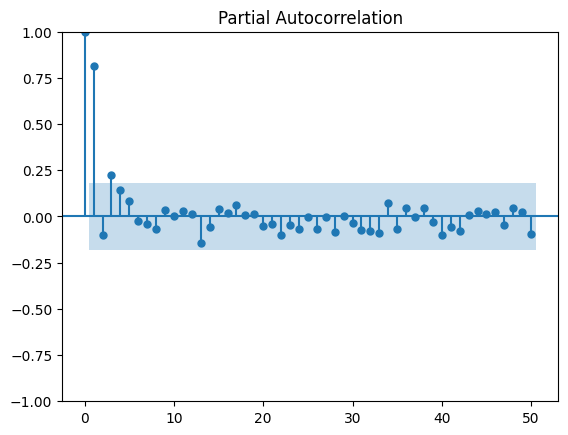

In [ ]:
# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(daily_prices, lags=50)
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(daily_prices, lags=50)
plt.show()


In [ ]:
result = adfuller(daily_prices['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

    # it is best described as random or irregular fluctuations around a constant mean.


ADF Statistic: -4.620456220601966
p-value: 0.0001184081032763939
The series is stationary.


predicted=8703.204508, expected=9860.662698
predicted=9647.452392, expected=9860.662698
predicted=9384.649668, expected=9860.662698
predicted=9562.949974, expected=9845.796781
predicted=9698.114162, expected=9845.796781
predicted=9793.663086, expected=9845.796781
predicted=9849.876022, expected=8777.720280
predicted=8950.686272, expected=8777.720280
predicted=9228.508595, expected=8777.720280
predicted=9071.533151, expected=9133.007853
predicted=9221.552878, expected=9133.007853
predicted=9041.726723, expected=9133.007853
predicted=9034.114871, expected=9133.007853
predicted=9085.011261, expected=9133.007853
predicted=9113.384358, expected=8987.330409
predicted=9010.351020, expected=8987.330409
predicted=9048.498062, expected=8925.921922
predicted=8976.797808, expected=8925.921922
predicted=8971.354291, expected=8925.921922
predicted=8951.668882, expected=9567.029821
predicted=9474.047261, expected=9567.029821
predicted=9301.089137, expected=9567.029821
predicted=9383.228726, expected=

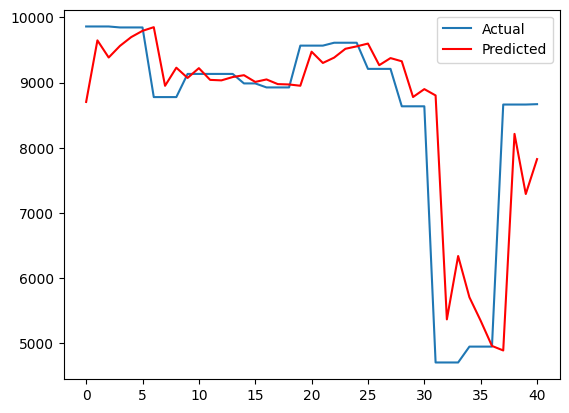

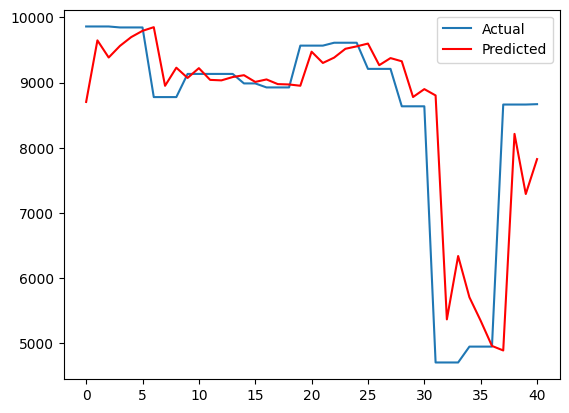

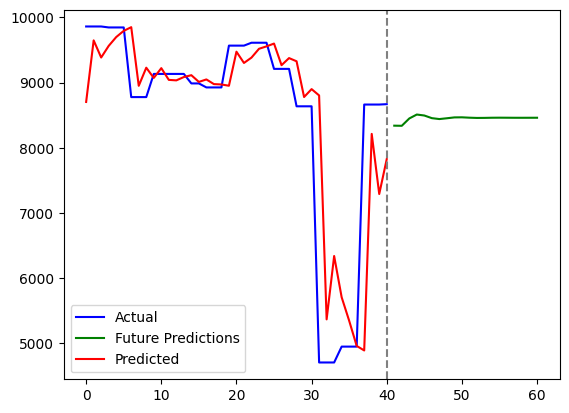

In [ ]:
# Data preprocessing

df.dropna(inplace=True)
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
daily_prices = df.groupby('Date_of_Journey')['Price'].mean().reset_index()
daily_prices.set_index('Date_of_Journey', inplace=True)
daily_prices = daily_prices.asfreq('D').fillna(method='ffill')

# Prepare data for ARIMA
X = daily_prices['Price'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
msle = mean_squared_log_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
r2 = r2_score(test, predictions)
accuracy = 100 * (1 - np.mean(np.abs((test - predictions) / test)))

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSE: {mse:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}%')
print(f'Test R-squared: {r2:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()
# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

# Continue making predictions beyond the test set
future_steps = 20  # Adjust this as needed
future_predictions = []

# Use the last window of observations from the test set to start making future predictions
last_window = list(test[-1:])

for _ in range(future_steps):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    future_value = output[0]
    future_predictions.append(future_value)
    history.append(future_value)
# Plot actual and predicted values along with continuation of predicted values
plt.plot(test, label='Actual', color='blue')
plt.plot(range(len(test), len(test) + len(future_predictions)), future_predictions, label='Future Predictions', color='green')
plt.plot(range(len(test)), predictions, label='Predicted', color='red')
plt.axvline(len(test)-1, color='gray', linestyle='--')  # Mark the end of actual data
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=11464.714937, expected=9860.662698


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9967.936584, expected=9860.662698


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9484.769025, expected=9860.662698


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=10567.429476, expected=9845.796781


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9705.658585, expected=9845.796781


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=10098.161326, expected=9845.796781


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9606.732488, expected=8777.720280
predicted=9064.168967, expected=8777.720280


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8052.213492, expected=8777.720280


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8914.148951, expected=9133.007853


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9017.034791, expected=9133.007853


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9397.345358, expected=9133.007853


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9911.734589, expected=9133.007853


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9209.037234, expected=9133.007853
predicted=8895.446338, expected=8987.330409
predicted=8993.449807, expected=8987.330409


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8917.448798, expected=8925.921922


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9085.133188, expected=8925.921922


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8644.461739, expected=8925.921922


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9131.480974, expected=9567.029821


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8950.888554, expected=9567.029821


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9798.051399, expected=9567.029821


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9506.289115, expected=9611.317172
predicted=9850.752442, expected=9611.317172


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9681.216880, expected=9611.317172


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9695.481735, expected=9210.277890


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8803.681655, expected=9210.277890


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9257.402151, expected=9210.277890


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9067.084784, expected=8636.332317


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8798.974743, expected=8636.332317


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8883.729926, expected=8636.332317


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9239.138764, expected=4707.371429
predicted=4022.402335, expected=4707.371429
predicted=4854.596070, expected=4707.371429
predicted=4532.809402, expected=4950.724771
predicted=5253.735441, expected=4950.724771
predicted=4925.490956, expected=4950.724771


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4849.294238, expected=8663.404558


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8453.106016, expected=8663.404558


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8658.925319, expected=8663.404558


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8245.678903, expected=8669.157746
Test RMSE: 1023.148
Test MAE: 514.212
Test MSE: 1046831.621
Test MSLE: 0.022
Test MAPE: 7.160%
Test R-squared: 0.587
Test Accuracy: 92.840%


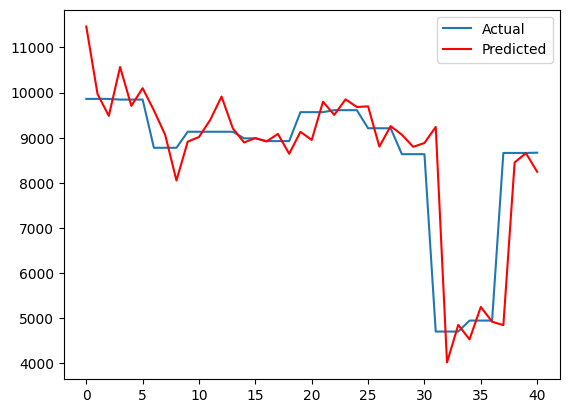

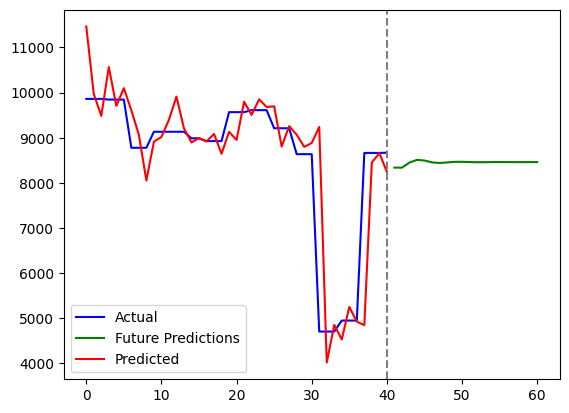

In [ ]:

# Prepare data for SARIMA
y = daily_prices['Price'].values
size = int(len(y) * 0.66)
train, test = y[0:size], y[size:]

# Define the SARIMA model
# Adjust the order, seasonal_order parameters according to your dataset
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # assuming monthly seasonality (change as needed)

history = [x for x in train]
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
msle = mean_squared_log_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
r2 = r2_score(test, predictions)
accuracy = 100 * (1 - np.mean(np.abs((test - predictions) / test)))

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSE: {mse:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}%')
print(f'Test R-squared: {r2:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()
# Plot actual and predicted values along with continuation of predicted values
plt.plot(test, label='Actual', color='blue')
plt.plot(range(len(test), len(test) + len(future_predictions)), future_predictions, label='Future Predictions', color='green')
plt.plot(range(len(test)), predictions, label='Predicted', color='red')
plt.axvline(len(test)-1, color='gray', linestyle='--')  # Mark the end of actual data
plt.legend()
plt.show()


Test RMSE: 1512.219
Test MAE: 1008.781
Test MSE: 2286807.498
Test MSLE: 0.050
Test MAPE: 15.700%
Test R-squared: 0.097
Test Accuracy: 84.300%


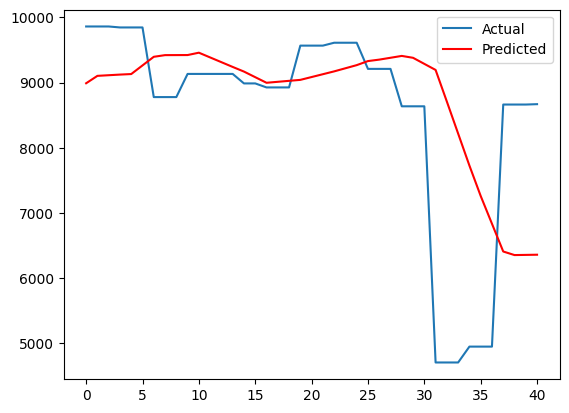

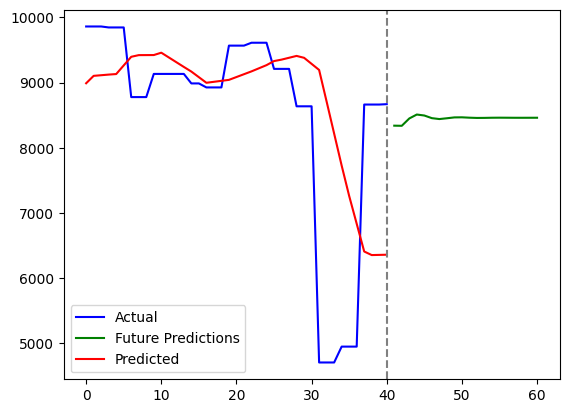

In [ ]:

# Prepare data for Moving Average
y = daily_prices['Price'].values
size = int(len(y) * 0.66)
train, test = y[0:size], y[size:]

# Define a simple moving average function
def moving_average_forecast(train, test, window_size):
    history = list(train)
    predictions = []
    for t in range(len(test)):
        if len(history) >= window_size:
            avg = np.mean(history[-window_size:])
        else:
            avg = np.mean(history)
        predictions.append(avg)
        history.append(test[t])
    return predictions

# Set the window size for the moving average
window_size = 10  # You can adjust this value as needed
predictions = moving_average_forecast(train, test, window_size)

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
msle = mean_squared_log_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
r2 = r2_score(test, predictions)
accuracy = 100 * (1 - np.mean(np.abs((test - predictions) / test)))

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSE: {mse:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}%')
print(f'Test R-squared: {r2:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()
# Plot actual and predicted values along with continuation of predicted values
plt.plot(test, label='Actual', color='blue')
plt.plot(range(len(test), len(test) + len(future_predictions)), future_predictions, label='Future Predictions', color='green')
plt.plot(range(len(test)), predictions, label='Predicted', color='red')
plt.axvline(len(test)-1, color='gray', linestyle='--')  # Mark the end of actual data
plt.legend()
plt.show()


Linear Regression Test RMSE: 5054.211
Linear Regression Test MAE: 4884.603
Linear Regression Test MSE: 25545048.007
Linear Regression Test MSLE: 0.774
Linear Regression Test MAPE: 56.329%
Linear Regression Test R-squared: -9.082
Linear Regression Test Accuracy: 43.671%


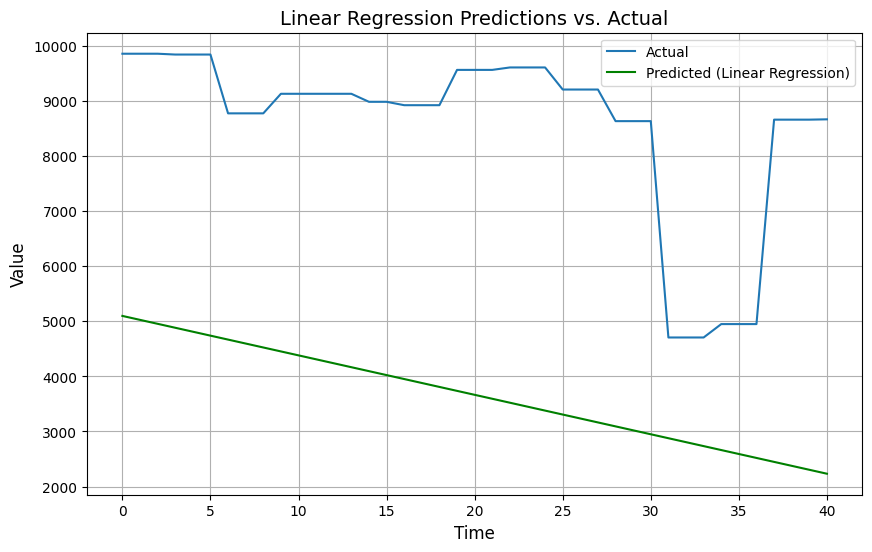

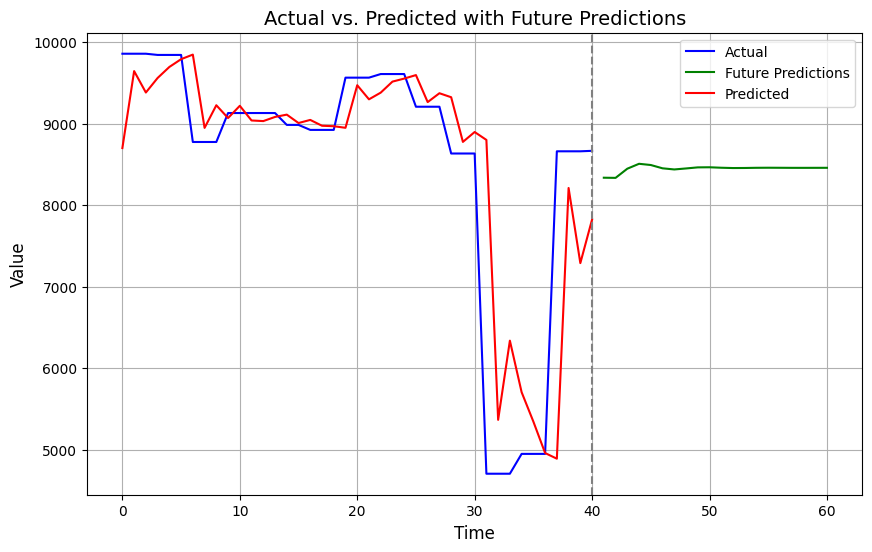

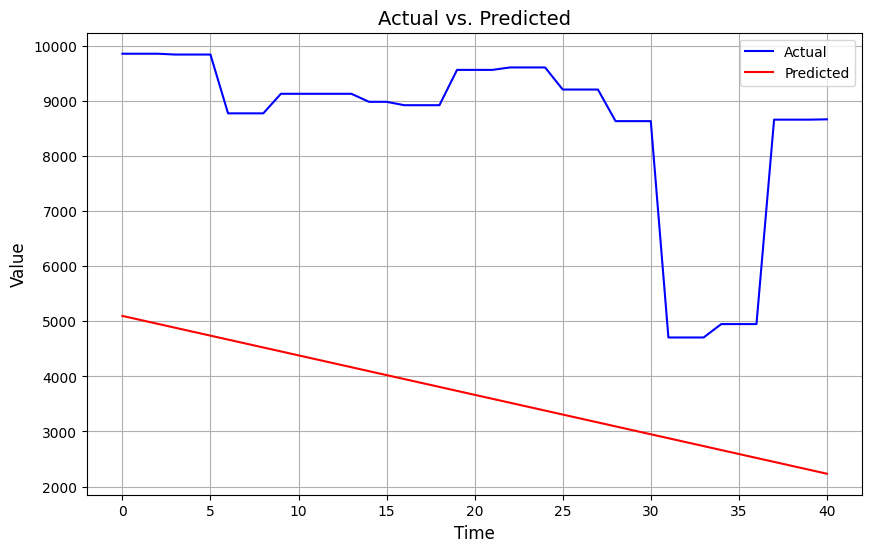

In [ ]:
from sklearn.linear_model import LinearRegression

# Define and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(np.arange(len(train)).reshape(-1, 1), train)

# Generate predictions for the test set
lr_predictions = lr_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))

# Evaluate Linear Regression forecasts
lr_rmse = sqrt(mean_squared_error(test, lr_predictions))
lr_mae = mean_absolute_error(test, lr_predictions)
lr_mse = mean_squared_error(test, lr_predictions)
lr_msle = mean_squared_log_error(test, lr_predictions)
lr_mape = np.mean(np.abs((test - lr_predictions) / test)) * 100
lr_r2 = r2_score(test, lr_predictions)
lr_accuracy = 100 * (1 - np.mean(np.abs((test - lr_predictions) / test)))

print(f'Linear Regression Test RMSE: {lr_rmse:.3f}')
print(f'Linear Regression Test MAE: {lr_mae:.3f}')
print(f'Linear Regression Test MSE: {lr_mse:.3f}')
print(f'Linear Regression Test MSLE: {lr_msle:.3f}')
print(f'Linear Regression Test MAPE: {lr_mape:.3f}%')
print(f'Linear Regression Test R-squared: {lr_r2:.3f}')
print(f'Linear Regression Test Accuracy: {lr_accuracy:.3f}%')

# Plot Linear Regression forecasts against actual outcomes
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.plot(test, label='Actual')
plt.plot(lr_predictions, color='green', label='Predicted (Linear Regression)')
plt.title('Linear Regression Predictions vs. Actual', fontsize=14)  # Add title with larger font size
plt.xlabel('Time', fontsize=12)  # Add x-axis label with larger font size
plt.ylabel('Value', fontsize=12)  # Add y-axis label with larger font size
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

# Plot actual and predicted values along with continuation of predicted values
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.plot(test, label='Actual', color='blue')
plt.plot(range(len(test), len(test) + len(future_predictions)), future_predictions, label='Future Predictions', color='green')
plt.plot(range(len(test)), predictions, label='Predicted', color='red')
plt.axvline(len(test)-1, color='gray', linestyle='--')  # Mark the end of actual data
plt.title('Actual vs. Predicted with Future Predictions', fontsize=14)  # Add title with larger font size
plt.xlabel('Time', fontsize=12)  # Add x-axis label with larger font size
plt.ylabel('Value', fontsize=12)  # Add y-axis label with larger font size
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

# Inspect individual predictions and actual values
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.plot(test, label='Actual', color='blue')
plt.plot(lr_predictions, label='Predicted', color='red')
plt.title('Actual vs. Predicted', fontsize=14)  # Add title with larger font size
plt.xlabel('Time', fontsize=12)  # Add x-axis label with larger font size
plt.ylabel('Value', fontsize=12)  # Add y-axis label with larger font size
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()


Simple Exponential Smoothing Test RMSE: 2411.980
Simple Exponential Smoothing Test MAE: 1546.537
Simple Exponential Smoothing Test MSE: 5817648.132
Simple Exponential Smoothing Test MSLE: 0.077
Simple Exponential Smoothing Test MAPE: 22.109%
Simple Exponential Smoothing Test R-squared: -1.296
Simple Exponential Smoothing Test Accuracy: 77.891%


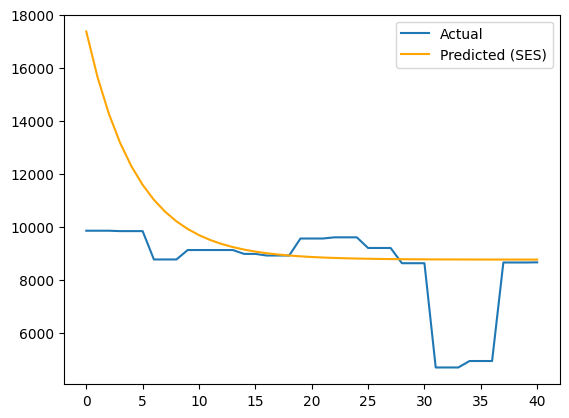

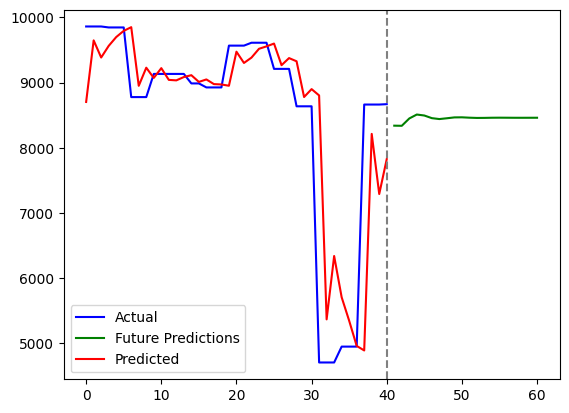

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Simple Exponential Smoothing Function
def simple_exponential_smoothing(train, test, alpha):
    predictions = []
    # Initialize the first prediction as the first observation in the training set
    predictions.append(train[0])
    # Iterate through the test set
    for t in range(len(test)):
        # Apply simple exponential smoothing formula
        prediction = alpha * train[-1] + (1 - alpha) * predictions[-1]
        predictions.append(prediction)
    return predictions[1:]  # Remove the first element which is the initial training value

# Define alpha value for Simple Exponential Smoothing
alpha = 0.2  # You can adjust this value based on your data and desired level of smoothing

# Generate Simple Exponential Smoothing forecasts
ses_predictions = simple_exponential_smoothing(train, test, alpha)

# Evaluate Simple Exponential Smoothing forecasts
ses_rmse = np.sqrt(mean_squared_error(test, ses_predictions))
ses_mae = mean_absolute_error(test, ses_predictions)
ses_mse = mean_squared_error(test, ses_predictions)
ses_msle = mean_squared_log_error(test, ses_predictions)
ses_mape = np.mean(np.abs((test - ses_predictions) / test)) * 100
ses_r2 = r2_score(test, ses_predictions)
ses_accuracy = 100 * (1 - np.mean(np.abs((test - ses_predictions) / test)))

print(f'Simple Exponential Smoothing Test RMSE: {ses_rmse:.3f}')
print(f'Simple Exponential Smoothing Test MAE: {ses_mae:.3f}')
print(f'Simple Exponential Smoothing Test MSE: {ses_mse:.3f}')
print(f'Simple Exponential Smoothing Test MSLE: {ses_msle:.3f}')
print(f'Simple Exponential Smoothing Test MAPE: {ses_mape:.3f}%')
print(f'Simple Exponential Smoothing Test R-squared: {ses_r2:.3f}')
print(f'Simple Exponential Smoothing Test Accuracy: {ses_accuracy:.3f}%')

# Plot Simple Exponential Smoothing forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(ses_predictions, color='orange', label='Predicted (SES)')
plt.legend()
plt.show()

# Plot actual and predicted values along with continuation of predicted values
plt.plot(test, label='Actual', color='blue')
plt.plot(range(len(test), len(test) + len(future_predictions)), future_predictions, label='Future Predictions', color='green')
plt.plot(range(len(test)), predictions, label='Predicted', color='red')
plt.axvline(len(test)-1, color='gray', linestyle='--')  # Mark the end of actual data
plt.legend()
plt.show()


Decision Tree Test RMSE: 0.106
Decision Tree Test MAE: 0.064
Decision Tree Test MSE: 0.011
Decision Tree Test MSLE: 0.008
Decision Tree Test MAPE: 153.341%
Decision Tree Test R-squared: -0.019
Decision Tree Test Accuracy: -53.341%


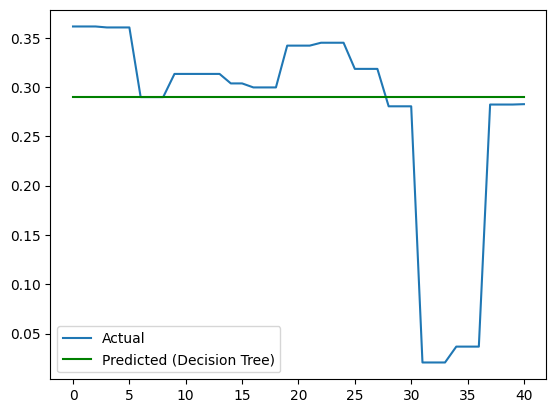

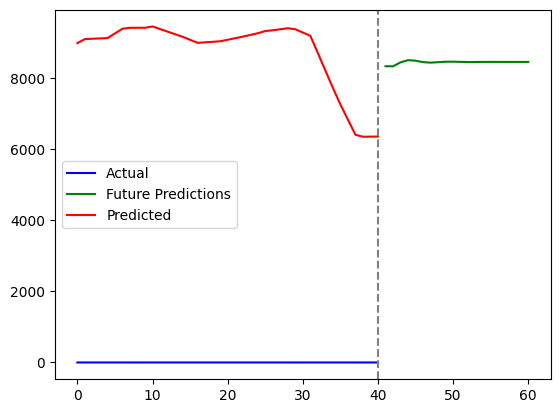

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define and fit the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(np.arange(len(train)).reshape(-1, 1), train)

# Generate predictions for the test set
dt_predictions = dt_model.predict(np.arange(len(train), len(train) + len(test)).reshape(-1, 1))

# Evaluate Decision Tree forecasts
dt_rmse = sqrt(mean_squared_error(test, dt_predictions))
dt_mae = mean_absolute_error(test, dt_predictions)
dt_mse = mean_squared_error(test, dt_predictions)
dt_msle = mean_squared_log_error(test, dt_predictions)
dt_mape = np.mean(np.abs((test - dt_predictions) / test)) * 100
dt_r2 = r2_score(test, dt_predictions)
dt_accuracy = 100 * (1 - np.mean(np.abs((test - dt_predictions) / test)))

print(f'Decision Tree Test RMSE: {dt_rmse:.3f}')
print(f'Decision Tree Test MAE: {dt_mae:.3f}')
print(f'Decision Tree Test MSE: {dt_mse:.3f}')
print(f'Decision Tree Test MSLE: {dt_msle:.3f}')
print(f'Decision Tree Test MAPE: {dt_mape:.3f}%')
print(f'Decision Tree Test R-squared: {dt_r2:.3f}')
print(f'Decision Tree Test Accuracy: {dt_accuracy:.3f}%')

# Plot Decision Tree forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(dt_predictions, color='green', label='Predicted (Decision Tree)')
plt.legend()
plt.show()
# Plot actual and predicted values along with continuation of predicted values
plt.plot(test, label='Actual', color='blue')
plt.plot(range(len(test), len(test) + len(future_predictions)), future_predictions, label='Future Predictions', color='green')
plt.plot(range(len(test)), predictions, label='Predicted', color='red')
plt.axvline(len(test)-1, color='gray', linestyle='--')  # Mark the end of actual data
plt.legend()
plt.show()



Epoch 1/20
67/67 - 4s - loss: 0.0197 - 4s/epoch - 60ms/step
Epoch 2/20
67/67 - 0s - loss: 0.0107 - 484ms/epoch - 7ms/step
Epoch 3/20
67/67 - 1s - loss: 0.0113 - 542ms/epoch - 8ms/step
Epoch 4/20
67/67 - 1s - loss: 0.0103 - 629ms/epoch - 9ms/step
Epoch 5/20
67/67 - 1s - loss: 0.0097 - 812ms/epoch - 12ms/step
Epoch 6/20
67/67 - 1s - loss: 0.0099 - 775ms/epoch - 12ms/step
Epoch 7/20
67/67 - 1s - loss: 0.0088 - 735ms/epoch - 11ms/step
Epoch 8/20
67/67 - 1s - loss: 0.0090 - 727ms/epoch - 11ms/step
Epoch 9/20
67/67 - 1s - loss: 0.0100 - 759ms/epoch - 11ms/step
Epoch 10/20
67/67 - 1s - loss: 0.0101 - 797ms/epoch - 12ms/step
Epoch 11/20
67/67 - 1s - loss: 0.0091 - 797ms/epoch - 12ms/step
Epoch 12/20
67/67 - 1s - loss: 0.0088 - 524ms/epoch - 8ms/step
Epoch 13/20
67/67 - 1s - loss: 0.0091 - 543ms/epoch - 8ms/step
Epoch 14/20
67/67 - 1s - loss: 0.0096 - 524ms/epoch - 8ms/step
Epoch 15/20
67/67 - 1s - loss: 0.0084 - 522ms/epoch - 8ms/step
Epoch 16/20
67/67 - 1s - loss: 0.0078 - 551ms/epoch - 8ms/s

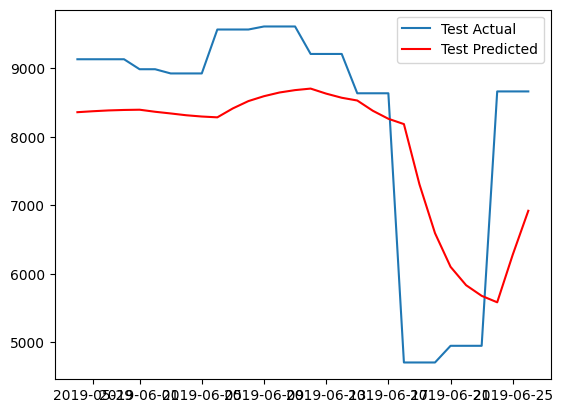

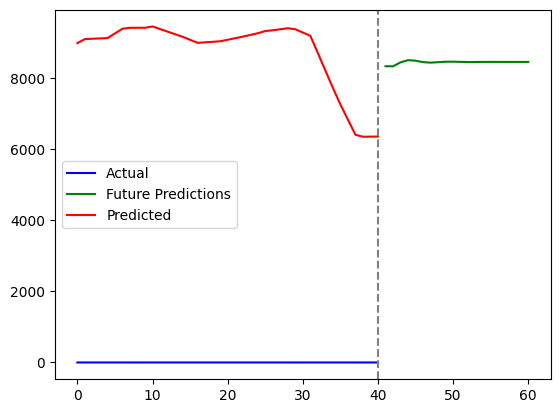

In [ ]:
# Install the required packages
!pip install tensorflow


# Load and preprocess the data
df.dropna(inplace=True)
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
daily_prices = df.groupby('Date_of_Journey')['Price'].mean().reset_index()
daily_prices.set_index('Date_of_Journey', inplace=True)
daily_prices = daily_prices.asfreq('D').fillna(method='ffill').reset_index()

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_prices['Price'].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.66)
train, test = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Evaluate forecasts
rmse = sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
mae = mean_absolute_error(y_test[0], test_predict[:,0])
mse = mean_squared_error(y_test[0], test_predict[:,0])
msle = mean_squared_log_error(y_test[0], test_predict[:,0])
mape = np.mean(np.abs((y_test[0] - test_predict[:,0]) / y_test[0])) * 100

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSE: {mse:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}')

# Calculate accuracy
accuracy = 1 - np.abs((y_test[0] - test_predict[:,0]) / y_test[0]).mean()
print(f'Test Accuracy: {accuracy:.3f}')

# Plot forecasts against actual outcomes
plt.plot(daily_prices['Date_of_Journey'][len(train_predict)+(look_back*2)+1:len(daily_prices)-1], y_test[0], label='Test Actual')
plt.plot(daily_prices['Date_of_Journey'][len(train_predict)+(look_back*2)+1:len(daily_prices)-1], test_predict[:, 0], color='red', label='Test Predicted')
plt.legend()
plt.show()
# Plot actual and predicted values along with continuation of predicted values
plt.plot(test, label='Actual', color='blue')
plt.plot(range(len(test), len(test) + len(future_predictions)), future_predictions, label='Future Predictions', color='green')
plt.plot(range(len(test)), predictions, label='Predicted', color='red')
plt.axvline(len(test)-1, color='gray', linestyle='--')  # Mark the end of actual data
plt.legend()
plt.show()
